In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import missingno as miss

In [2]:
def outliers(data, feature):
    Q1= data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

# Forward Filling

In [3]:
data1 = pd.read_excel("/Users/sreeya/Documents/Uni/Thesis/dataset2.xlsx")

In [4]:
data2 = pd.read_excel("/Users/sreeya/Documents/Uni/Thesis/dataset_kyle.xlsx")

In [5]:
data1 = data1[(data1['Av. DHP (bar)'] != 0) & (data1['Av. DHP (bar)'] != 0) ]
data1 = data1[(data1['Av. DHP (bar)'] > -273)]
data1 = data1[(data1['Oil (m3)'] != 0) & (data1['Gas (m3)'] != 0) ]
press_upper, press_lower = outliers(data1, "Av. DHP (bar)")
temp_upper, temp_lower = outliers(data1, "Av. DHT (Deg C)")
data1 = data1[(data1['Av. DHP (bar)'] > press_lower) & (data1['Av. DHP (bar)'] < press_upper)]
data1 = data1[(data1['Av. DHT (Deg C)'] > temp_lower) & (data1['Av. DHT (Deg C)'] < temp_upper)]
data2 = data2[(data2['Av. DHP (bar)'] != 0) & (data2['Av. DHT (Deg C)'] != 0) ]
data2 = data2[(data2['Oil (m3)'] > 1) & (data2['Gas (m3)'] > 1) ]
data2 = data2[(data2['Av. DHT (Deg C)'] > -273)]
press_upper1, press_lower1 = outliers(data2, "Av. DHP (bar)")
temp_upper1, temp_lower1 = outliers(data2, "Av. DHT (Deg C)")
data2 = data2[(data2['Av. DHP (bar)'] > press_lower1) & (data2['Av. DHP (bar)'] < press_upper1)]
data2 = data2[(data2['Av. DHT (Deg C)'] > temp_lower1) & (data2['Av. DHT (Deg C)'] < temp_upper1)]


In [6]:
data = pd.concat([data1,data2], ignore_index=True)

In [7]:
bin_count = int(np.ceil(np.log2(len(data['Hours Online']))) + 1)

Hours Online

<AxesSubplot:xlabel='Hours Online'>

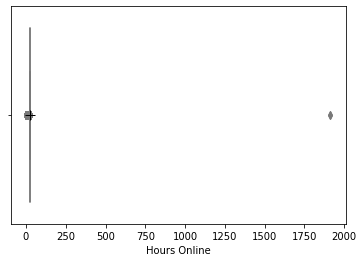

In [8]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Hours Online'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for hrs_online.png')

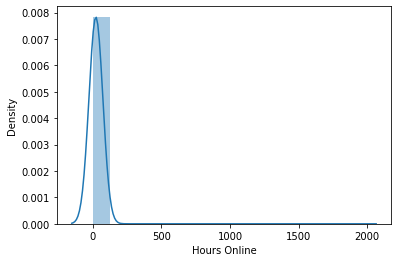

In [9]:
fig, ax = plt.subplots()
sns.distplot(data['Hours Online'],hist=True,bins=bin_count,kde_kws={'bw_adjust':15})
# plt.savefig('kde distribution fitting for hrs_online.png')
plt.show() 

<AxesSubplot:xlabel='Hours Online', ylabel='Count'>

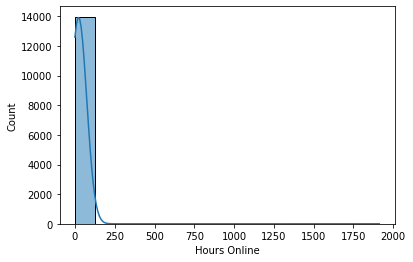

In [10]:
sns.histplot(data['Hours Online'],bins=bin_count,kde=True,kde_kws={'bw_adjust':15})
# plt.savefig('histogram for hrs_online.png')

Av. DHP (bar)

<AxesSubplot:xlabel='Av. DHP (bar)'>

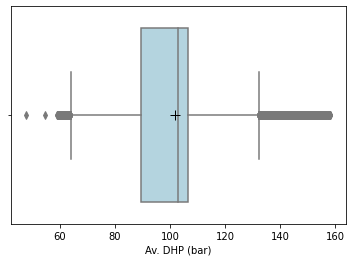

In [11]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for press.png')

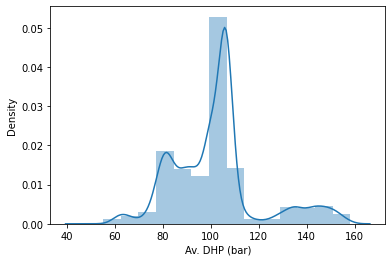

In [12]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHP (bar)'],hist=True,bins=bin_count)
# plt.savefig('kde distribution fitting for press.png')
plt.show() 

<AxesSubplot:xlabel='Av. DHP (bar)', ylabel='Count'>

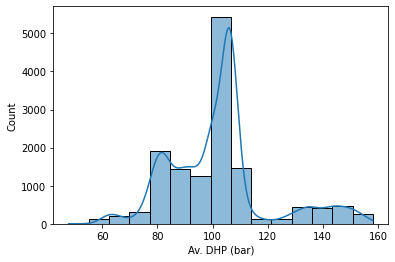

In [13]:
sns.histplot(data['Av. DHP (bar)'],bins=bin_count,kde=True)
# plt.savefig('histogram for press.png')

Av. DHT (Deg C)

<AxesSubplot:xlabel='Av. DHT (Deg C)'>

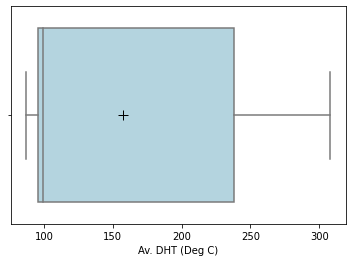

In [14]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for temp kyle.png')

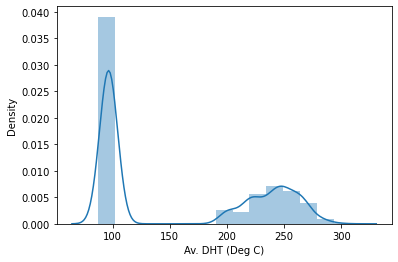

In [15]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':.7})
# plt.savefig('kde distribution fitting for temp kyle.png')
plt.show() 

<AxesSubplot:xlabel='Av. DHT (Deg C)', ylabel='Count'>

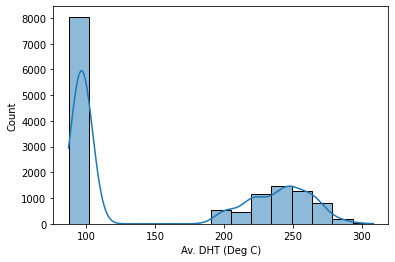

In [16]:
sns.histplot(data['Av. DHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':.7})
# plt.savefig('histogram for temp kyle.png')

Oil (m3)

<AxesSubplot:xlabel='Oil (m3)'>

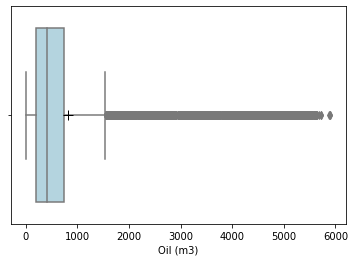

In [17]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Oil (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for oil.png')

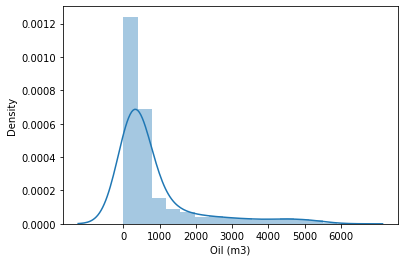

In [18]:
fig, ax = plt.subplots()
sns.distplot(data['Oil (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xticks(range(0,7000,1000))
# plt.savefig('kde distribution fitting for oil.png')
plt.show() 

(0.0, 4000.0)

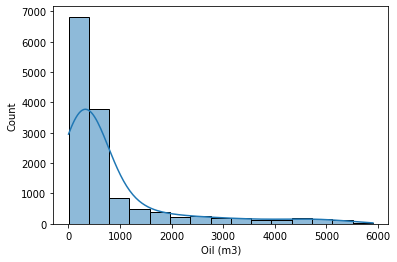

In [19]:
sns.histplot(data['Oil (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,4000)
# plt.savefig('histogram for oil.png')

Gas (m3)

<AxesSubplot:xlabel='Gas (m3)'>

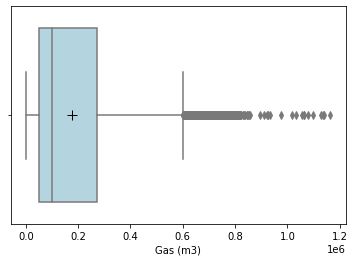

In [20]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Gas (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for gas.png')

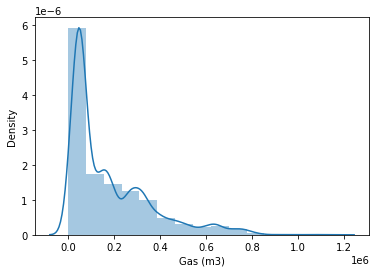

In [21]:
fig, ax = plt.subplots()
sns.distplot(data['Gas (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':1})
# plt.savefig('kde distribution fitting for gas.png')
plt.show() 

<AxesSubplot:xlabel='Gas (m3)', ylabel='Count'>

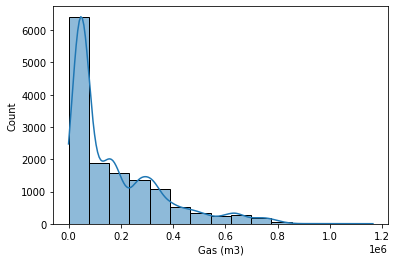

In [22]:
sns.histplot(data['Gas (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':1})
# plt.savefig('histogram for gas.png')

Av. WHT (Deg C)

<AxesSubplot:xlabel='Av. WHT (Deg C)'>

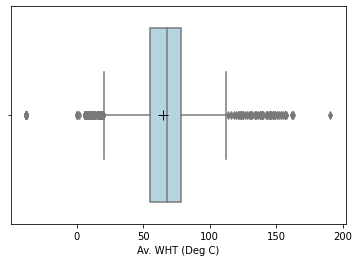

In [23]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for whp press.png')

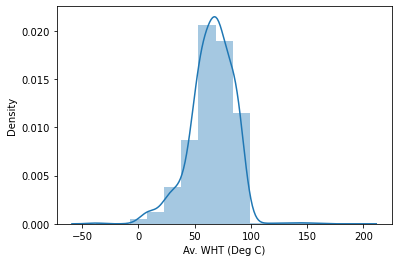

In [24]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})

# plt.savefig('kde distribution fitting for whp press.png')
plt.show() 

<AxesSubplot:xlabel='Av. WHT (Deg C)', ylabel='Count'>

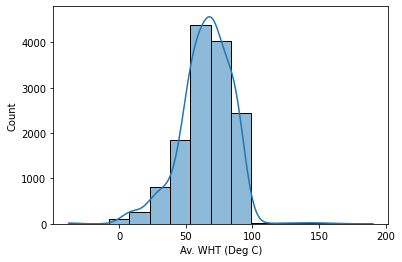

In [25]:
sns.histplot(data['Av. WHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
# plt.savefig('histogram for whp press.png')

Av. WHP (bar)

<AxesSubplot:xlabel='Av. WHP (bar)'>

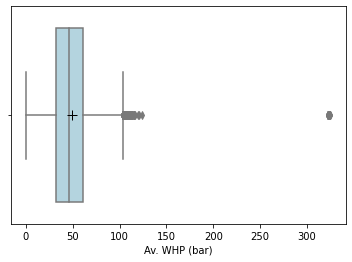

In [26]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for whp press kyle.png')
# ax.set_xlim(-10,400)
# ax.set_xticks(range(0,400,30))

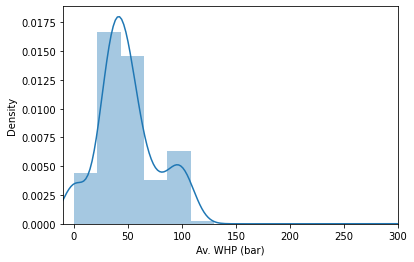

In [27]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHP (bar)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(-10,300)
# plt.savefig('kde distribution fitting for whp press kyle.png')
plt.show() 

<AxesSubplot:xlabel='Av. WHP (bar)', ylabel='Count'>

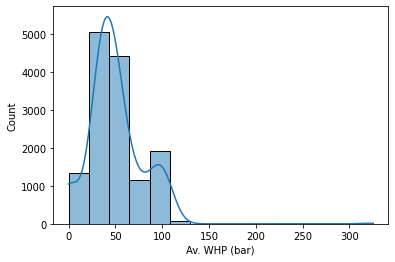

In [28]:
sns.histplot(data['Av. WHP (bar)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
# plt.savefig('histogram for whp press kyle.png')

In [29]:
# data.to_excel("/Users/sreeya/Documents/Uni/Thesis/newer dataset/ff//ff_dataset_final.xlsx",index=False)

# Median Imputation

In [30]:
data1 = pd.read_excel("/Users/sreeya/Documents/Uni/Thesis/mean imputation dataset/new/dataset_kyle_mean_cleaned.xlsx")

In [31]:
data2 = pd.read_excel("/Users/sreeya/Documents/Uni/Thesis/mean imputation dataset/new/volve_cleaned_mean.xlsx")

In [32]:
data1 = data1[(data1['Av. DHP (bar)'] != 0) & (data1['Av. DHP (bar)'] != 0) ]
data1 = data1[(data1['Av. DHP (bar)'] > -273)]
data1 = data1[(data1['Oil (m3)'] != 0) & (data1['Gas (m3)'] != 0) ]
press_upper, press_lower = outliers(data1, "Av. DHP (bar)")
temp_upper, temp_lower = outliers(data1, "Av. DHT (Deg C)")
data1 = data1[(data1['Av. DHP (bar)'] > press_lower) & (data1['Av. DHP (bar)'] < press_upper)]
data1 = data1[(data1['Av. DHT (Deg C)'] > temp_lower) & (data1['Av. DHT (Deg C)'] < temp_upper)]
data2 = data2[(data2['Av. DHP (bar)'] != 0) & (data2['Av. DHT (Deg C)'] != 0) ]
data2 = data2[(data2['Oil (m3)'] > 1) & (data2['Gas (m3)'] > 1) ]
data2 = data2[(data2['Av. DHT (Deg C)'] > -273)]
press_upper1, press_lower1 = outliers(data2, "Av. DHP (bar)")
temp_upper1, temp_lower1 = outliers(data2, "Av. DHT (Deg C)")
data2 = data2[(data2['Av. DHP (bar)'] > press_lower1) & (data2['Av. DHP (bar)'] < press_upper1)]
data2 = data2[(data2['Av. DHT (Deg C)'] > temp_lower1) & (data2['Av. DHT (Deg C)'] < temp_upper1)]


In [33]:
data = pd.concat([data1,data2], ignore_index=True)

Hours Online

<AxesSubplot:xlabel='Hours Online'>

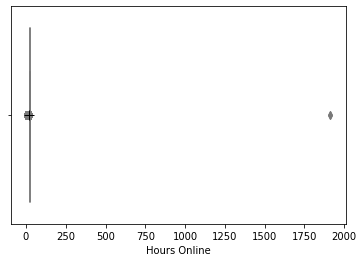

In [34]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Hours Online'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for hrs_online.png')

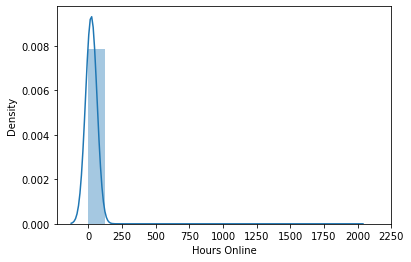

In [35]:
fig, ax = plt.subplots()
sns.distplot(data['Hours Online'],hist=True,bins=bin_count,kde_kws={'bw_adjust':15})
ax.set_xticks(range(0,2500,250))
# plt.savefig('kde distribution fitting for hrs_online.png')
plt.show() 

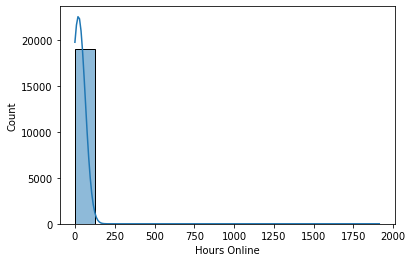

In [36]:
sns.histplot(data['Hours Online'],bins=bin_count,kde=True,kde_kws={'bw_adjust':15})
ax.set_xticks(range(0,2000,500))
# plt.savefig('histogram for hrs_online.png')

Av. DHP (bar)

<AxesSubplot:xlabel='Av. DHP (bar)'>

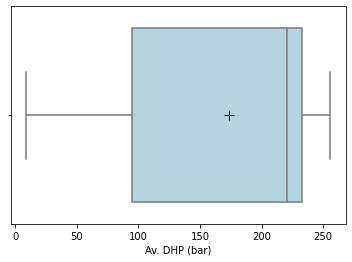

In [37]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for press.png')

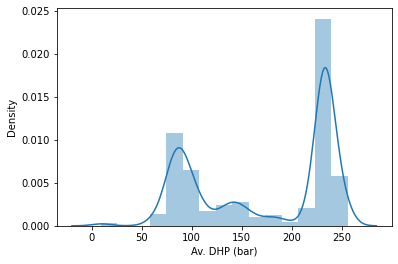

In [38]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHP (bar)'],hist=True,bins=bin_count)
# plt.savefig('kde distribution fitting for press.png')
plt.show() 

<AxesSubplot:xlabel='Av. DHP (bar)', ylabel='Count'>

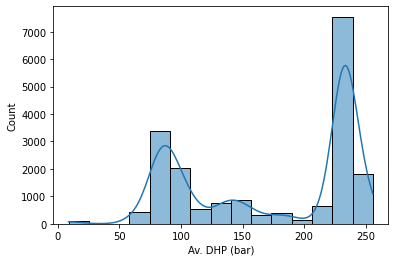

In [39]:
sns.histplot(data['Av. DHP (bar)'],bins=bin_count,kde=True)
# plt.savefig('histogram for press.png')

Av. DHT (Deg C)

<AxesSubplot:xlabel='Av. DHT (Deg C)'>

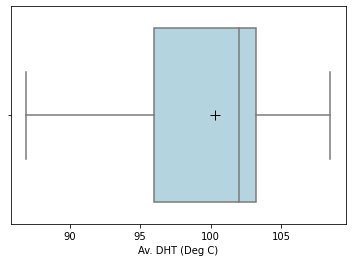

In [40]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for temp kyle.png')


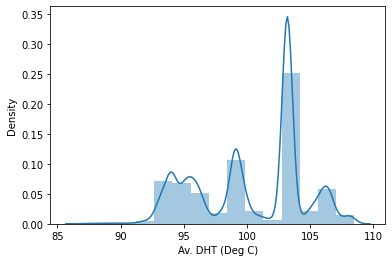

In [41]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':.7})
# plt.savefig('kde distribution fitting for temp kyle.png')
plt.show() 

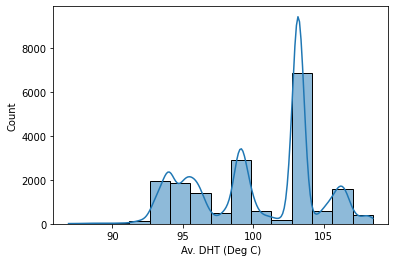

In [42]:
sns.histplot(data['Av. DHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':.7})
ax.set_xticks(range(85,120,5))
# plt.savefig('histogram for temp kyle.png')

Oil (m3)

<AxesSubplot:xlabel='Oil (m3)'>

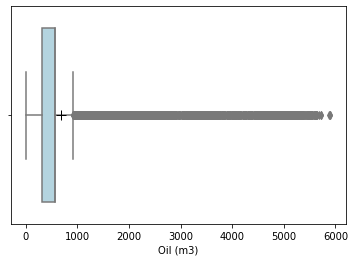

In [43]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Oil (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for oil.png')

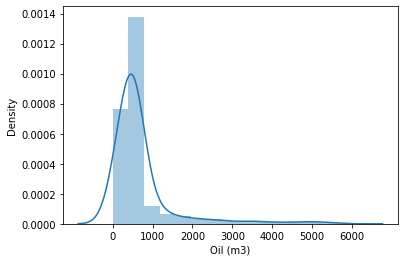

In [44]:
fig, ax = plt.subplots()
sns.distplot(data['Oil (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xticks(range(0,7000,1000))
# plt.savefig('kde distribution fitting for oil.png')
plt.show() 

(0.0, 4000.0)

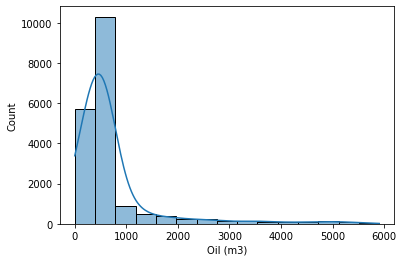

In [45]:
sns.histplot(data['Oil (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,4000)
# plt.savefig('histogram for oil.png')

Gas (m3)

<AxesSubplot:xlabel='Gas (m3)'>

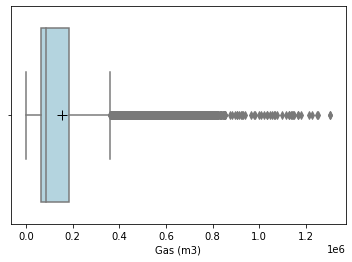

In [46]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Gas (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for gas.png')

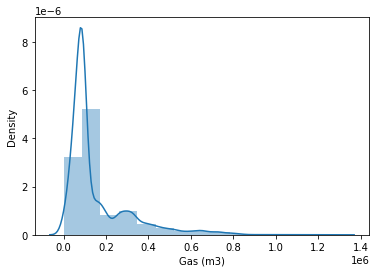

In [47]:
fig, ax = plt.subplots()
sns.distplot(data['Gas (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':1})
# plt.savefig('kde distribution fitting for gas.png')
plt.show() 

<AxesSubplot:xlabel='Gas (m3)', ylabel='Count'>

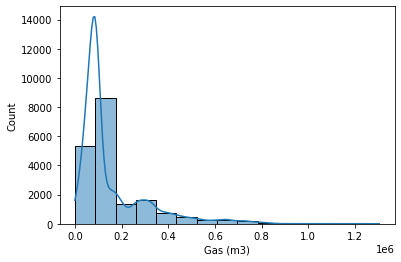

In [48]:
sns.histplot(data['Gas (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':1})
# plt.savefig('histogram for gas.png')

Av. WHT (Deg C)

<AxesSubplot:xlabel='Av. WHT (Deg C)'>

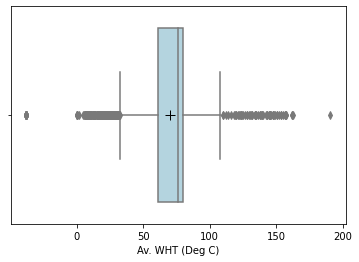

In [49]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for whp press.png')

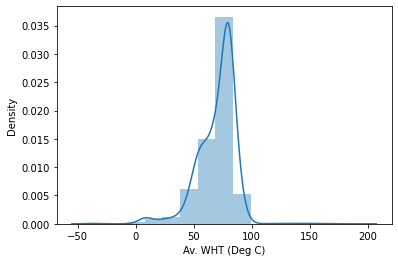

In [50]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
# plt.savefig('kde distribution fitting for whp press.png')
plt.show() 

<AxesSubplot:xlabel='Av. WHT (Deg C)', ylabel='Count'>

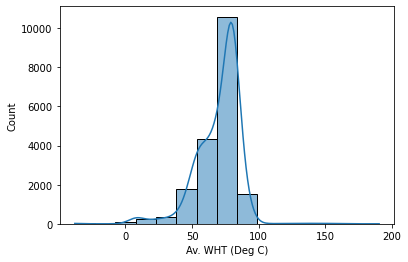

In [51]:
sns.histplot(data['Av. WHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
# plt.savefig('histogram for whp press.png')

Av. WHP (bar)

<AxesSubplot:xlabel='Av. WHP (bar)'>

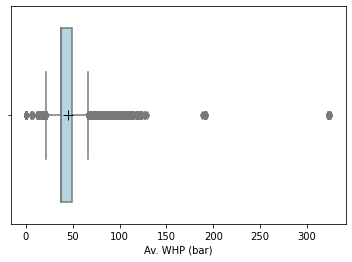

In [52]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for whp press kyle.png')

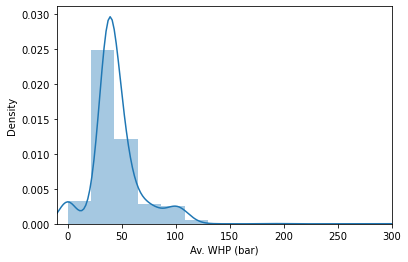

In [53]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHP (bar)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(-10,300)
# plt.savefig('kde distribution fitting for whp press kyle.png')
plt.show() 

<AxesSubplot:xlabel='Av. WHP (bar)', ylabel='Count'>

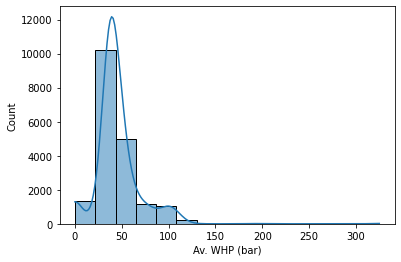

In [54]:
sns.histplot(data['Av. WHP (bar)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
# plt.savefig('histogram for whp press kyle.png')

In [55]:
# data.to_excel("/Users/sreeya/Documents/Uni/Thesis/newer dataset/mi/MI_dataset_final.xlsx",index=False)

# New Imputation Method

In [56]:
data1 = pd.read_excel("/Users/sreeya/Documents/Uni/Thesis/new imputation style dataset/volve_cleaned.xlsx")
data2 = pd.read_excel("/Users/sreeya/Documents/Uni/Thesis/new imputation style dataset/dataset_kyle_cleaned.xlsx")
data1 = data1[(data1['Av. DHP (bar)'] != 0) & (data1['Av. DHP (bar)'] != 0) ]
data1 = data1[(data1['Av. DHP (bar)'] > -273)]
data1 = data1[(data1['Oil (m3)'] != 0) & (data1['Gas (m3)'] != 0) ]
press_upper, press_lower = outliers(data1, "Av. DHP (bar)")
temp_upper, temp_lower = outliers(data1, "Av. DHT (Deg C)")
data1 = data1[(data1['Av. DHP (bar)'] > press_lower) & (data1['Av. DHP (bar)'] < press_upper)]
data1 = data1[(data1['Av. DHT (Deg C)'] > temp_lower) & (data1['Av. DHT (Deg C)'] < temp_upper)]
data2 = data2[(data2['Av. DHP (bar)'] != 0) & (data2['Av. DHT (Deg C)'] != 0) ]
data2 = data2[(data2['Oil (m3)'] > 1) & (data2['Gas (m3)'] > 1) ]
data2 = data2[(data2['Av. DHT (Deg C)'] > -273)]
press_upper1, press_lower1 = outliers(data2, "Av. DHP (bar)")
temp_upper1, temp_lower1 = outliers(data2, "Av. DHT (Deg C)")
data2 = data2[(data2['Av. DHP (bar)'] > press_lower1) & (data2['Av. DHP (bar)'] < press_upper1)]
data2 = data2[(data2['Av. DHT (Deg C)'] > temp_lower1) & (data2['Av. DHT (Deg C)'] < temp_upper1)]


In [57]:
data = pd.concat([data1,data2], ignore_index=True)

In [58]:
# data.to_excel("/Users/sreeya/Documents/Uni/Thesis/new imputation style dataset/final_dataset.xlsx",index=False)

Hours Online

<AxesSubplot:xlabel='Hours Online'>

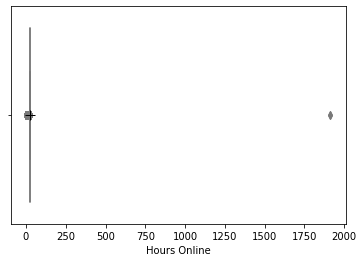

In [59]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Hours Online'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for hrs_online.png')

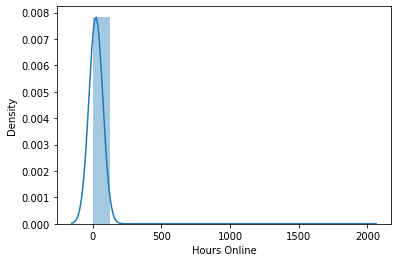

In [60]:
fig, ax = plt.subplots()
sns.distplot(data['Hours Online'],hist=True,bins=bin_count,kde_kws={'bw_adjust':15})
# plt.savefig('kde distribution fitting for hrs_online.png')
plt.show() 

<AxesSubplot:xlabel='Hours Online', ylabel='Count'>

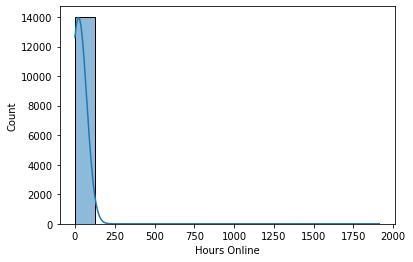

In [61]:
sns.histplot(data['Hours Online'],bins=bin_count,kde=True,kde_kws={'bw_adjust':15})
# plt.savefig('histogram for hrs_online.png')

Av. DHP (bar)

<AxesSubplot:xlabel='Av. DHP (bar)'>

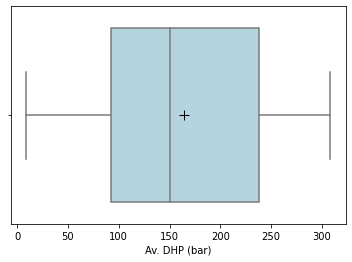

In [62]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for press.png')

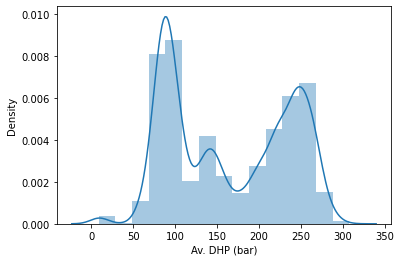

In [63]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHP (bar)'],hist=True,bins=bin_count)
# plt.savefig('kde distribution fitting for press.png')
plt.show() 

<AxesSubplot:xlabel='Av. DHP (bar)', ylabel='Count'>

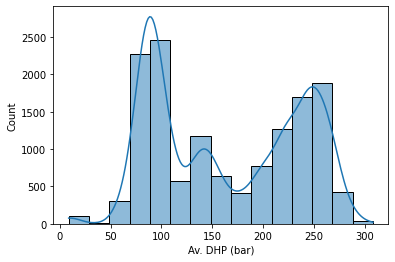

In [64]:
sns.histplot(data['Av. DHP (bar)'],bins=bin_count,kde=True)
# plt.savefig('histogram for press.png')

Av. DHT (Deg C)

<AxesSubplot:xlabel='Av. DHT (Deg C)'>

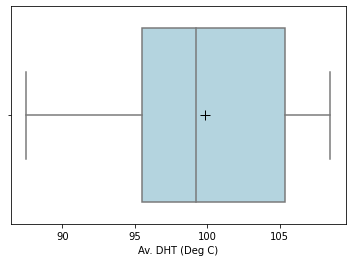

In [65]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. DHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})
# plt.savefig('boxplot for temp kyle.png')

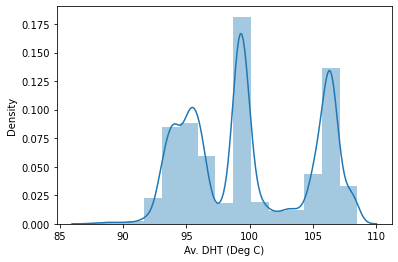

In [66]:
fig, ax = plt.subplots()
sns.distplot(data['Av. DHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':.7})
# plt.savefig('kde distribution fitting for temp kyle.png')
plt.show() 

<AxesSubplot:xlabel='Av. DHT (Deg C)', ylabel='Count'>

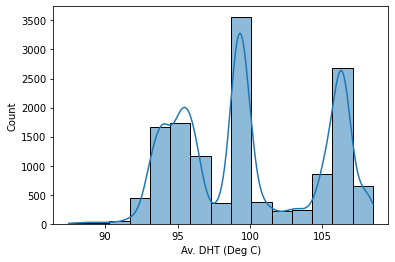

In [67]:
sns.histplot(data['Av. DHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':.7})
# plt.savefig('histogram for temp kyle.png')

Oil (m3)

<AxesSubplot:xlabel='Oil (m3)'>

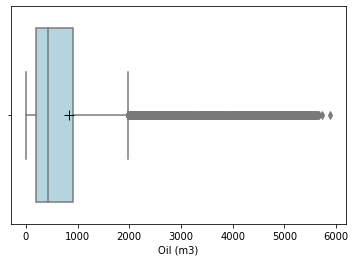

In [68]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Oil (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for oil.png')

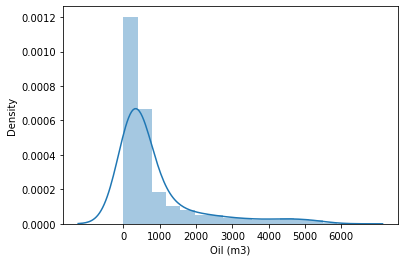

In [69]:
fig, ax = plt.subplots()
sns.distplot(data['Oil (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xticks(range(0,7000,1000))
# plt.savefig('kde distribution fitting for oil.png')
plt.show() 

(0.0, 4000.0)

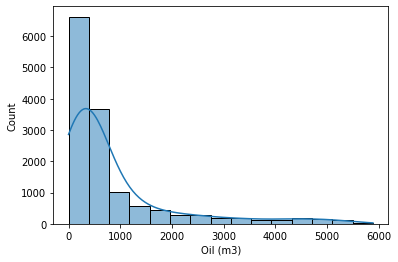

In [70]:
sns.histplot(data['Oil (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
ax.set_xlim(0,4000)
# plt.savefig('histogram for oil.png')

Gas (m3)

<AxesSubplot:xlabel='Gas (m3)'>

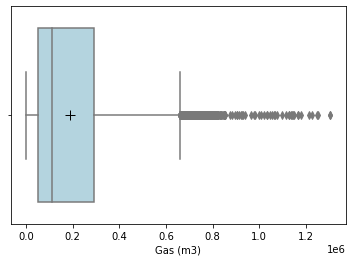

In [71]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Gas (m3)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for gas.png')

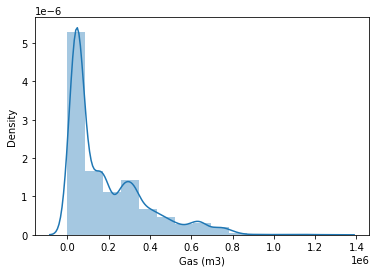

In [72]:
fig, ax = plt.subplots()
sns.distplot(data['Gas (m3)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':1})
# plt.savefig('kde distribution fitting for gas.png')
plt.show() 

<AxesSubplot:xlabel='Gas (m3)', ylabel='Count'>

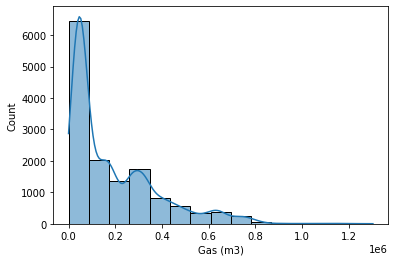

In [73]:
sns.histplot(data['Gas (m3)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':1})
# plt.savefig('histogram for gas.png')

Av. WHT (Deg C)

<AxesSubplot:xlabel='Av. WHT (Deg C)'>

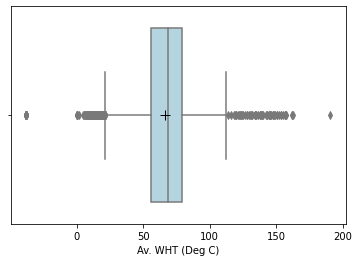

In [74]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHT (Deg C)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for whp press.png')

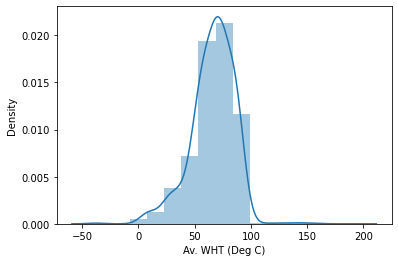

In [75]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHT (Deg C)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})

# plt.savefig('kde distribution fitting for whp press.png')
plt.show() 

<AxesSubplot:xlabel='Av. WHT (Deg C)', ylabel='Count'>

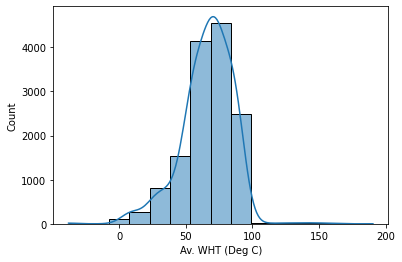

In [76]:
sns.histplot(data['Av. WHT (Deg C)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
# plt.savefig('histogram for whp press.png')

Av. WHP (bar)

<AxesSubplot:xlabel='Av. WHP (bar)'>

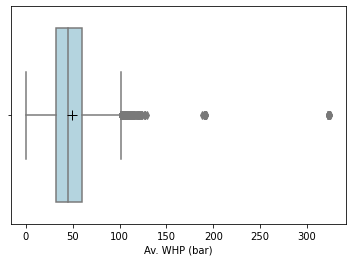

In [77]:
fig, ax = plt.subplots()
sns.boxplot(x = data['Av. WHP (bar)'],color='lightblue',showmeans=True,meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

# plt.savefig('boxplot for whp press kyle.png')
# ax.set_xlim(-10,400)
# ax.set_xticks(range(0,400,30))

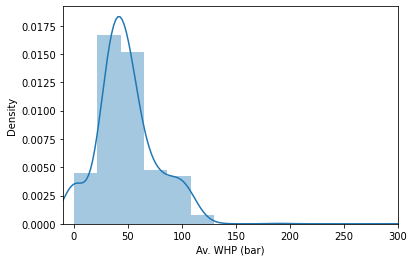

In [78]:
fig, ax = plt.subplots()
sns.distplot(data['Av. WHP (bar)'],hist=True,bins=bin_count,kde_kws={'bw_adjust':2.5})
ax.set_xlim(-10,300)
# plt.savefig('kde distribution fitting for whp press kyle.png')
plt.show() 

<AxesSubplot:xlabel='Av. WHP (bar)', ylabel='Count'>

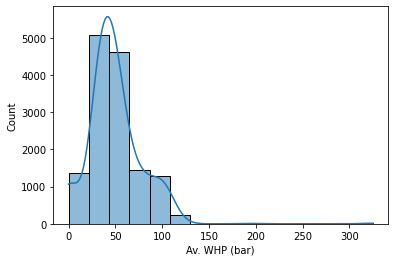

In [79]:
sns.histplot(data['Av. WHP (bar)'],bins=bin_count,kde=True,kde_kws={'bw_adjust':2.5})
# plt.savefig('histogram for whp press kyle.png')

In [80]:
# data.to_excel("/Users/sreeya/Documents/Uni/Thesis/newer dataset/ff//ff_dataset_final.xlsx",index=False)